You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
trends = pd.read_csv('ai_tools_comparison.csv')

# Inspect the data
print(trends.head())

         week  chatgpt  gemini  microsoft_copilot
0  2023-08-27       56       3                  1
1  2023-09-03       56       3                  1
2  2023-09-10       63       3                  1
3  2023-09-17       64       3                  1
4  2023-09-24       66       3                  1


In [2]:
trends['week'] = pd.to_datetime(trends['week'])
trends.set_index('week', inplace=True)

Project Instructions
Your goal is to extract meaningful insights from the search data by answering the following questions.

- Which AI tool has shown the most consistent growth in interest over the observed period (the full dataset)? Save the name of the tool as `most_consistent_tool` of type Data type: `string`.

In [5]:
growth_rates = trends.pct_change().fillna(0).mul(100)
std_dev = growth_rates.std()

most_consistent_tool = std_dev.idxmin() 
print(f"Most consistent tool: {most_consistent_tool}")

Most consistent tool: chatgpt


- Create a visualization showing the interest levels of ChatGPT, Gemini, and Microsoft Copilot over time. Around which month and year does ChatGPT experience its largest decline in interest? Save as `gpt_dip` of type `string` in the format "Month YYYY".

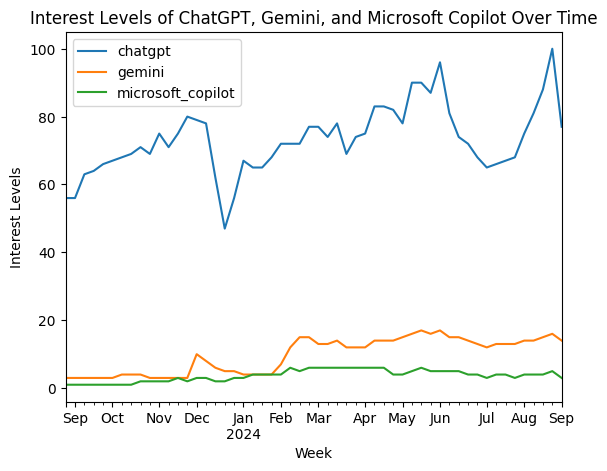

In [6]:
interest_levels = trends.copy()

interest_levels.plot(title="Interest Levels of ChatGPT, Gemini, and Microsoft Copilot Over Time")
plt.xlabel('Week')
plt.ylabel('Interest Levels')
plt.show()

In [8]:
gpt_dip = 'December 2023'
print(f"The worst month and year for ChatGPT: {gpt_dip}")

The worst month and year for ChatGPT: December 2023


- Explore the seasonality in the data by breaking it down into monthly averages. What month had the highest average interest across all tools? Save the month as `best_month` as type `string`.

In [9]:
monthly_data = trends.resample('M').mean()

print(monthly_data.mean(axis=1).sort_values(ascending=False).index[0])

2024-05-31 00:00:00


In [10]:
best_month = monthly_data.mean(axis=1).idxmax().strftime('%B')
print(f"Month with the highest interest: {best_month}")

Month with the highest interest: May


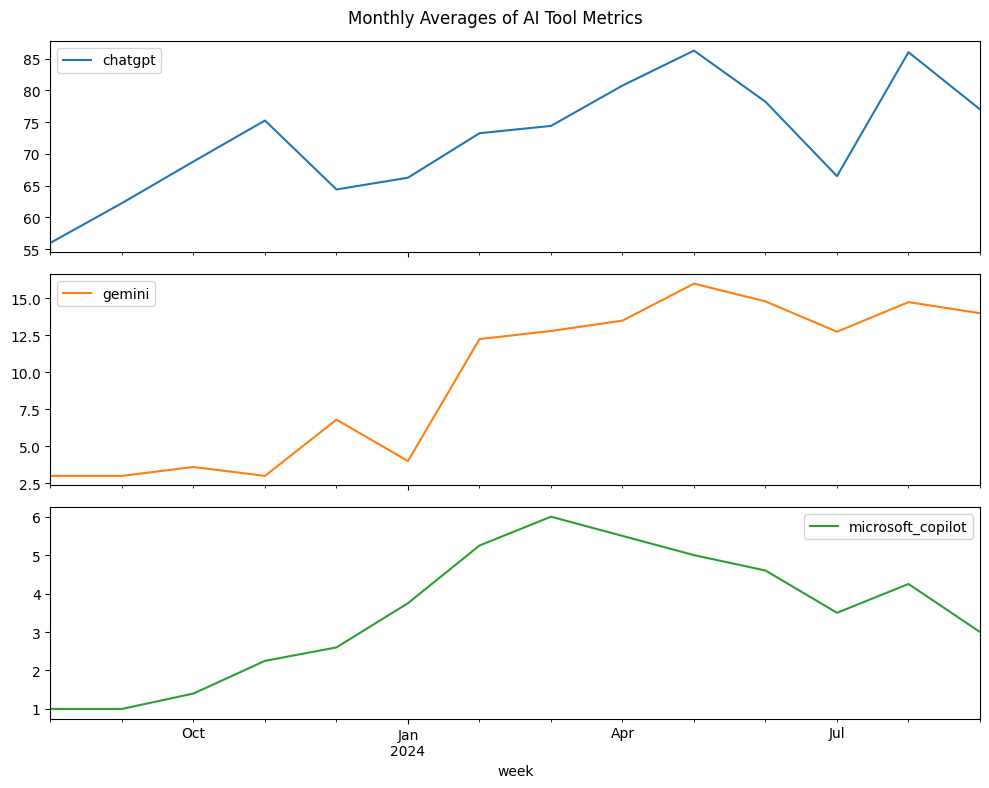

In [11]:
monthly_data.plot(subplots=True, figsize=(10, 8), title='Monthly Averages of AI Tool Metrics')

plt.tight_layout()
plt.show()